# 1. Introduction

---

**Name**                : Ladityarsa Ilyankusuma

**E-Mail**               : ladityarsa.ian@gmail.com

---

### i. Links and References

- Dataset Kaggle Source: [Top 1500 games on steam by revenue 09-09-2024](https://www.kaggle.com/datasets/alicemtopcu/top-1500-games-on-steam-by-revenue-09-09-2024/data)
- Deployment Dashboard: [Public Tableu Dashboard](https://public.tableau.com/app/profile/rd.ladityarsa.ilyankusuma/viz/P0M1_rd_ladityarsa_ilyankusuma/DataVisualization?publish=yes)

### ii. Dataset Breakdown

##### • Overview

The dataset contains comprehensive information on the top 1500 games released on Steam between January 1, 2024, and September 9, 2024. Aggregated from 30 separate files, and combined into a single dataset. Minor adjustments were made, such as aligning game release dates for consistency.

`Key Features`:

* Game Details: Includes titles, release dates, and developer/publisher information.
* Sales and Revenue: Tracks the number of copies sold, revenue generated, and pricing details.
* Player Engagement: Provides average playtime, peak player counts, and other user engagement metrics.
* Reviews and Scores: Features review scores and ratings.
* Dynamic Market Data: Offers insights into game performance trends over time, such as sales rank and price fluctuations.

##### • Columns

- `name`: Represents the title or name of the game.
- `releaseDate`: The official release date of the game, indicating when it became available to the public.
- `copiesSold`: The total number of units or copies of the game sold.
- `price`: The original retail price of the game at the time of its release.
- `revenue`: The amount of money generated from the sales of the game.
- `avgPlaytime`: The average duration that players have spent playing the game.
- `reviewScore`: The score or rating given to the game based on user and critic reviews.
- `publisherClass`: The classification of the publisher, indicating whether the publisher is a AAA, AA, or indie.
- `publishers`: The name of the company responsible for publishing the game.
- `developers`: The name(s) of the development team or company that created the game.
- `steamId`: A unique identifier assigned to the game by Steam for tracking and management.

# 2. Problem Statement and Dataset Description

###  Case Study - Gaming Market Penetration

In light of the recent boom in games made by small independent companies such as Palworld by Pocketpair and Lethal Company by Zeekerss, an upcoming indie game company is interested in making their first hit. Our goal is to identify the optimal game design, pricing, and launch strategy for the company’s first commercial title in order to maximize the chances of hitting commercially viable sales.

### Business Understanding

##### Defining the Problem Statements

Using `SMART` Framework:

- `Specific`: Use a dataset of existing game’s market performance to identify the characteristics (price, content, launch timing) of successful indie games, in order to develop a data-driven strategy for launching an indie title with the highest possible chance of achieving commercial success on first release.
- `Measurable`:
    * Achieve at least 120.000 copies sold
    * Achieve a revenue per copy sold of ≥ $8
    * Achieve a user review score of ≥ 80%
- `Achievable`:
    * Develop a game that offers the amount of hours of playtime to match what top indie titles deliver
    * Target a launch price range and model revenue per copy using real sales/revenue ratios from similar games
    * Aim for release when competition is lower and games historically perform well
    * Set the scope and outcomes only with other indie publisher class
- `Relevant`: It's a data-driven pre-launch playbook that aligns game design with actual market behavior. This data helps us reduce our debut’s risks by designing a game with features proven to work in the current market.
- `Time-Bound`: Build predictive insights by week 3, define design marketing and pricing strategy by week 4, develop the game within the next 6 months, and track performance against the SMART targets within the next 3 months.

**Problem Statement**:

The goal is to develop a data-driven strategy for launching a debut indie title with as little risk as possible, aiming for at least 120.000 copies sold, ≥ $8 of revenue per copy sold, and ≥ 80% of user review score. This will be achieved by developing a game with characteristics such as amount of playtime hours, targeted launch price range, and a release window to match what other top indie titles deliver, within a total timespan of 9 months.

##### Breaking Down the Problem

**Main problem**: `Achieving prefered number of copies sold, revenue and user review as a metric for successful market penetration.`

To ease our analysis and solve the problem, we need to understand the detail about the problem. To do it, we can use `5W+1H` framework:

- `What` factors lead to high copies sold and positive user reviews?
- `What` is the average review score by game length group (short/medium/long)?
- `What` is the revenue-per-copy range among top-selling indie games?
- `When` are the best months to release a new game, based on the sales trends?
- `How` strongly is average playtime correlated with user review score?
- `How` can we scope our first game to match top 25% performers in this dataset?

### Data Understanding

##### Basic Data Information

**Dataset Description**:

This dataset contains comprehensive information on the top 1500 games released on Steam between January 1, 2024, and September 9, 2024. Aggregated from 30 separate files, and combined into a single dataset.

**Context**

Predict the characteristic of an upcoming successful indie title. We can analyze all relevant data from current existing gaming market performance to develop a focused pre-launch strategy.

**Content**

Thorough information about existing games - release date, copies sold, pricing, revenue gained, publisher class, along with the game's customer metrics - their average playtime and user review score.

# 3. Data Loading

### Prerequisite : Importing the libraries

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("steam_games_2024_dataset.csv")
df

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


In [51]:
df.head(10)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
5,Soulmask,30-05-2024,304685,29.99,7540563.0,95.697813,79,Indie,Qooland Games,CampFire Studio,2646460
6,The Universim,22-01-2024,328945,29.99,7534369.0,16.868531,81,Indie,Crytivo,Crytivo,352720
7,Bellwright,23-04-2024,280955,29.99,7481940.0,41.418885,78,Indie,"Donkey Crew,Snail Games USA",Donkey Crew,1812450
8,Night of the Dead,31-05-2024,394364,29.99,7091792.0,27.597072,79,Indie,Jackto Studios,Jackto Studios,1377380
9,Empires of the Undergrowth,07-06-2024,408292,29.99,6950952.0,38.602124,95,AA,"Hooded Horse,Slug Disco",Slug Disco,463530


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [53]:
df.columns

Index(['name', 'releaseDate', 'copiesSold', 'price', 'revenue', 'avgPlaytime',
       'reviewScore', 'publisherClass', 'publishers', 'developers', 'steamId'],
      dtype='object')

In [54]:
df.nunique()

name              1500
releaseDate        235
copiesSold        1460
price               58
revenue           1497
avgPlaytime       1500
reviewScore         72
publisherClass       4
publishers        1131
developers        1406
steamId           1500
dtype: int64

# 4. Data Cleaning

In [55]:
df.isna().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        1
developers        2
steamId           0
dtype: int64

In [56]:
df = df.dropna()
df.isna().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64

In [57]:
print(f"There are now '{len(df)}' total datas in the data frame")

There are now '1497' total datas in the data frame


In [62]:
print(f"There are '{df['reviewScore'][df['reviewScore'] == 0].count()}' datas with review score at 0")

There are '99' datas with review score at 0


In [63]:
df = df.drop(df[df['reviewScore'] == 0].index)
print(f"There are now '{len(df)}' total datas in the data frame")

There are now '1398' total datas in the data frame


In [64]:
print(f"There are '{df['price'][df['price'] == 0].count()}' datas with price at 0")

There are '79' datas with price at 0


In [306]:
print('Dtype of releaseDate =', df['releaseDate'].dtypes)

Dtype of releaseDate = object


In [307]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%d-%m-%Y')
print('New Dtype of releaseDate =', df['releaseDate'].dtypes)

New Dtype of releaseDate = datetime64[ns]


In [308]:
df[['releaseDate']].head(10)

,releaseDate
0,2024-03-07
1,2024-07-25
2,2024-08-15
3,2024-06-14
4,2024-06-13
5,2024-05-30
6,2024-01-22
7,2024-04-23
8,2024-05-31
9,2024-06-07


In [ ]:
df.to_csv("steam_games_2024_dataset_clean.csv", index=False)

# 5. Exploration and Analysis

### What factors lead to high copies sold and positive user reviews?

To be able to answer the question, we must first define what classifies as high copies sold and positive user reviews. To define these we can see their distribution per game's basis. Below is the histogram for the distribution of copies sold.

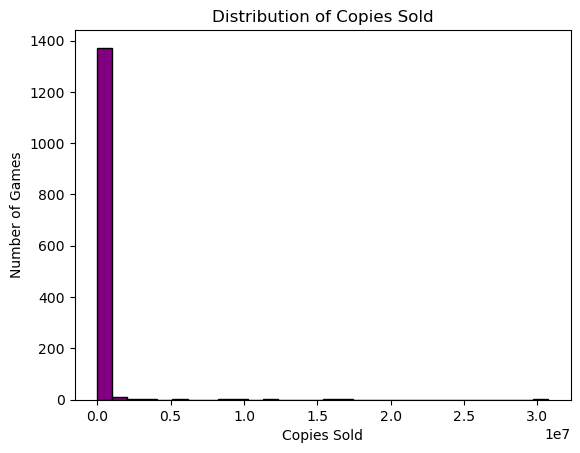

In [ ]:
plt.hist(df['copiesSold'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Copies Sold")
plt.xlabel("Copies Sold")
plt.ylabel("Number of Games")

plt.show()

We have a bit of a roadblock here. As you can see, or you can't to be more precise, we can't determine anything from this histogram because the data is heavily pulled to the right by the extreme positive outliers. To circumvent this, we can filter out the data by only including the 90th percentile, by using the codes below.

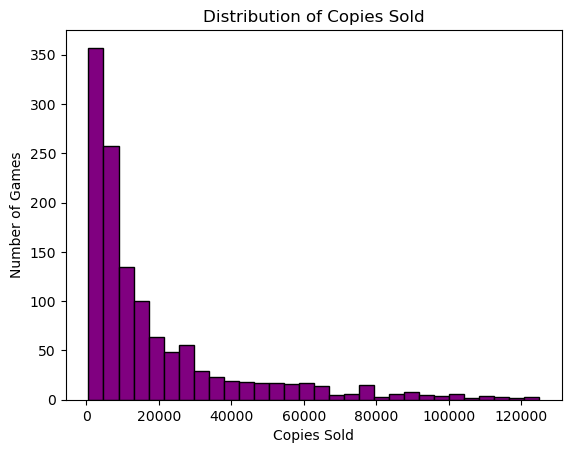

In [ ]:
# Filter the extreme outliers by the 90th percentile
ninetieth = df[df['copiesSold'] <= df['copiesSold'].quantile(0.9)]

# Distribution of Copies Sold by the 90th percentile
plt.hist(ninetieth['copiesSold'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Copies Sold")
plt.xlabel("Copies Sold")
plt.ylabel("Number of Games")

plt.show()

Without the extreme positive outliers, we can now see the histogram a bit more clearly. We can concur that most games sold 5 to 10 thousand copies, thus we can conclude that if we sell more than 10 thousand copies, we are already on our way to making it to the big leagues. We'll also do this to see what classifies as positive user reviews, and then we'll jump straight into determining the factors that make them sell well and get positive reviews by players. I'll combine all of the charts into one subplot below.

C:\Users\iangr\AppData\Local\Temp\ipykernel_37076\722779750.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninetieth['binCopies'] = pd.qcut(ninetieth['copiesSold'], q=10)
C:\Users\iangr\AppData\Local\Temp\ipykernel_37076\722779750.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ninetieth['binReview'] = pd.qcut(ninetieth['reviewScore'], q=10)


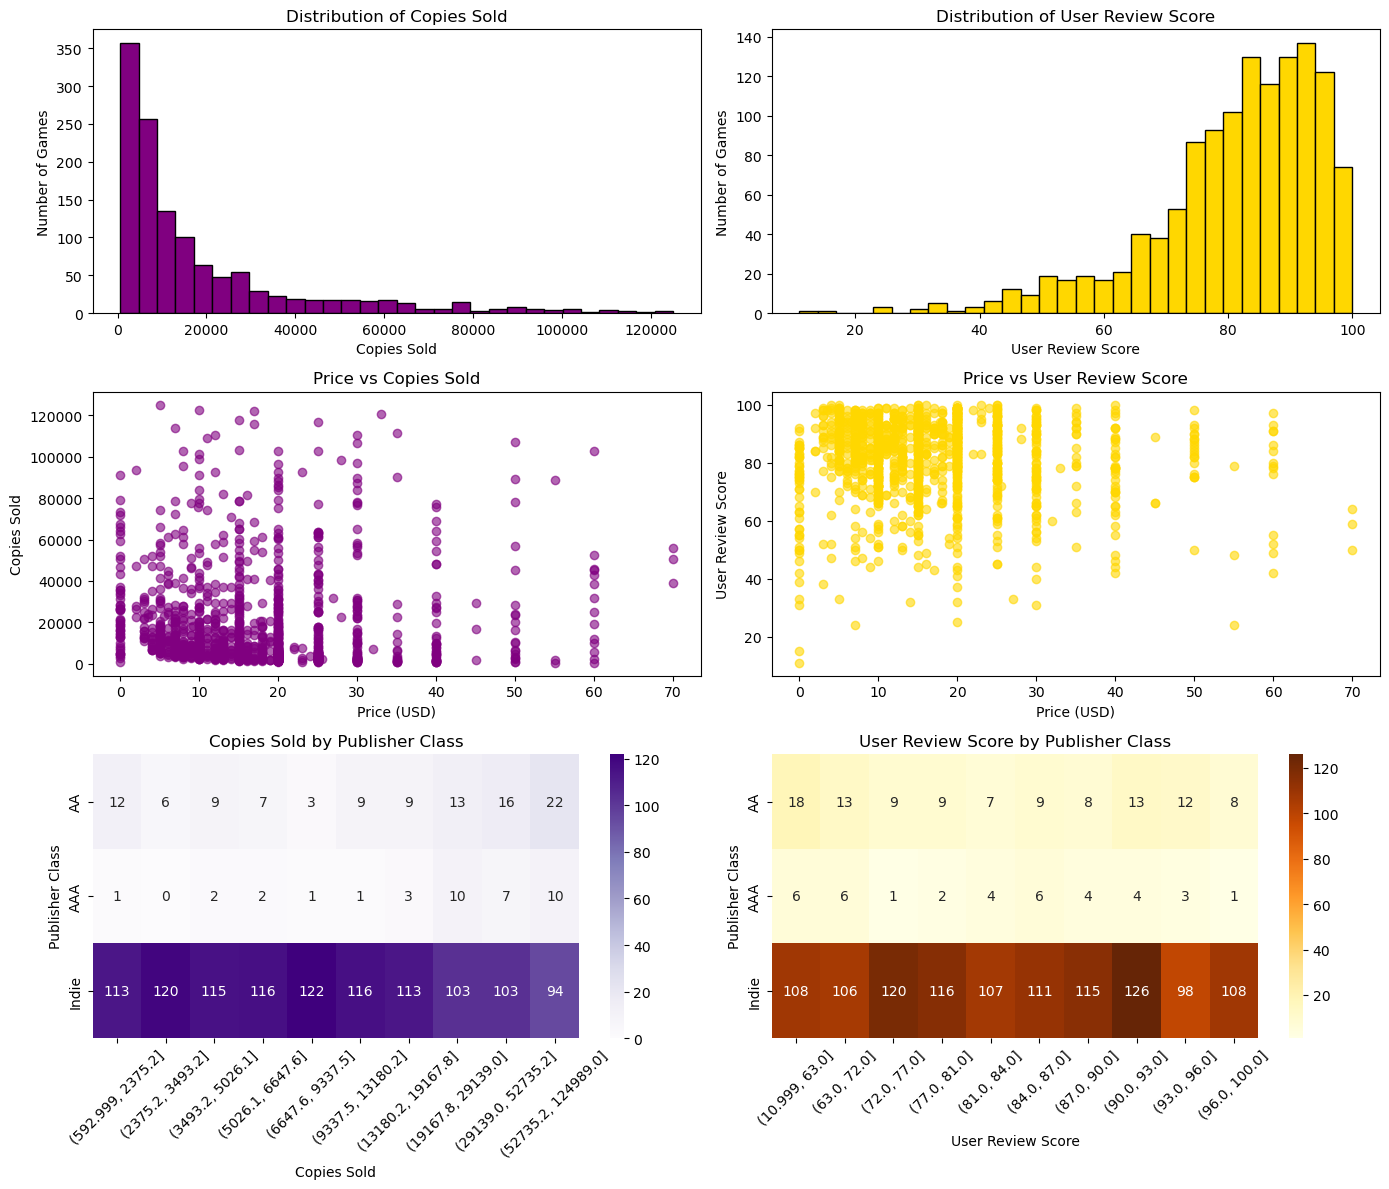

In [513]:
# Set up figure layout
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Plot 1: Distribution of Copies Sold
axs[0, 0].hist(ninetieth['copiesSold'], bins=30, color='purple', edgecolor='black')
axs[0, 0].set_title("Distribution of Copies Sold")
axs[0, 0].set_xlabel("Copies Sold")
axs[0, 0].set_ylabel("Number of Games")

# Plot 2: Distribution of User Review Score
axs[0, 1].hist(ninetieth['reviewScore'], bins=30, color='gold', edgecolor='black')
axs[0, 1].set_title("Distribution of User Review Score")
axs[0, 1].set_xlabel("User Review Score")
axs[0, 1].set_ylabel("Number of Games")

# Plot 3: Price vs Copies Sold
axs[1, 0].scatter(ninetieth['price'], ninetieth['copiesSold'], alpha=0.6, color='purple')
axs[1, 0].set_title("Price vs Copies Sold")
axs[1, 0].set_xlabel("Price (USD)")
axs[1, 0].set_ylabel("Copies Sold")

# Plot 4: Price vs User Review Score
axs[1, 1].scatter(ninetieth['price'], ninetieth['reviewScore'], alpha=0.6, color='gold')
axs[1, 1].set_title("Price vs User Review Score")
axs[1, 1].set_xlabel("Price (USD)")
axs[1, 1].set_ylabel("User Review Score")

# Plot 5: Copies Sold by Publisher Class
ninetieth['binCopies'] = pd.qcut(ninetieth['copiesSold'], q=10)
heat_data_copies = pd.crosstab(ninetieth['publisherClass'], ninetieth['binCopies'])
sns.heatmap(heat_data_copies, annot=True, fmt="d", cmap="Purples", cbar=True, ax=axs[2, 0])
axs[2, 0].set_title("Copies Sold by Publisher Class")
axs[2, 0].set_xlabel("Copies Sold")
axs[2, 0].set_ylabel("Publisher Class")
axs[2, 0].tick_params(axis='x', rotation=45)

# Plot 6: User Review Score by Publisher Class
ninetieth['binReview'] = pd.qcut(ninetieth['reviewScore'], q=10)
heat_data_review = pd.crosstab(ninetieth['publisherClass'], ninetieth['binReview'])
sns.heatmap(heat_data_review, annot=True, fmt="d", cmap="YlOrBr", cbar=True, ax=axs[2, 1])
axs[2, 1].set_title("User Review Score by Publisher Class")
axs[2, 1].set_xlabel("User Review Score")
axs[2, 1].set_ylabel("Publisher Class")
axs[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

We got some interesting datas here, let's break it down. First regarding what classifies a game as positively reviewed, it looks like that most games got an outstandingly good reviews, most of them got more than 80 on the review score. We can concur that we have to get at least 80 user review score to have a positive review on our game.

Now let's look at the factors that makes these games good. I chose the metric of price and publisher class to determine these on this segment.

For determining the factor of game's pricing to it being sold well and having positive review, I chose the scatter plot chart, because we can see trends more easily. And by looking at it we can immideatly see that most games sold at 5 to 20 dollar mark, even though being pretty cheap, alredy net enough copies sold to be classified as selling well. It is also important to note that most games sold at a uniform pricing of the multiplicative of tens. So it is safer for us to choose this trend of pricing, and don't sell our game at like say 27 dollars. If we look at the price against user review side, we can also easily see that most games sold at the 5 to 20 dollar mark gets the most positive reviews. It actualy makes perfect sense because the lower the starting price for a game, the easier it is to break the market, and gain the love of new customers.

For determining the factor of game's publisher class to it being sold well and having positive review, I chose the heatmap chart, because we can see trends of three different categories more easily. From this chart we can see that Indie titles make up the most of 2024's games, which is really nice for us on the same boat, because it determines that there is indeed a huge market for independently developed games. We can also see from the binning of the heatmap itself that the indie games mostly sold 2 thousand to 30 thousand copies, and they get mostly positive usser reviews as well. The trend doesn't even stop at the higher caliber, because indie games also stil selling well over 100 thousand copies and getting well over 90 user review scores. It is a really great early sign for Indie studios everywhere including us.

### What is the average review score by game length group (short/medium/long)?

To be able to answer this question, we must first group the average playtime of the games by short, medium, and long, but first let's see the distribution of the average playtime.

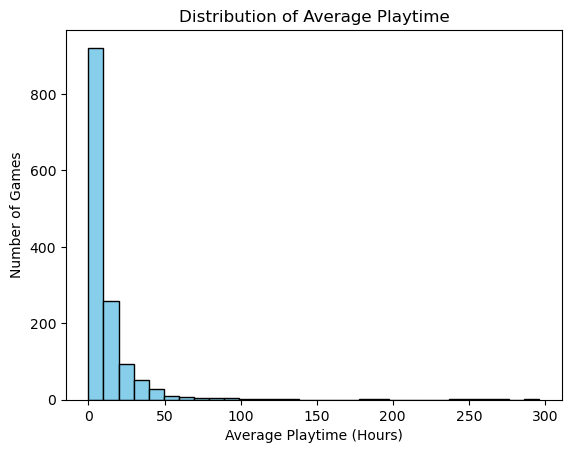

In [ ]:
plt.hist(df['avgPlaytime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Playtime')
plt.xlabel('Average Playtime (Hours)')
plt.ylabel('Number of Games')

plt.show()

We can see that almost all games have an average length below 50 hours. This will let us know that the distribution of the groups will not be even at all, but it is fine. I'll group the average playtimes below.

In [ ]:
# Get the value for the 33% quantile and 66% quantile
oneThird = df['avgPlaytime'].quantile(1/3)
twoThird = df['avgPlaytime'].quantile(2/3)

# Print the ranges
print(f"Short if < {oneThird:.2f} hours")
print(f"Medium if {oneThird:.2f} – {twoThird:.2f} hours")
print(f"Long if > {twoThird:.2f} hours")

Short if < 4.40 hours
Medium if 4.40 – 10.28 hours
Long if > 10.28 hours


Now let's make a dataframe that will have a new column tha contains these groupings. I make new dataframe onwards so that I don't touch the original dataframe and potentially break the later analysis.

In [ ]:
df_playtimeLength = df[['reviewScore', 'avgPlaytime']]

df_playtimeLength['playtimeLength'] = 'Long'
df_playtimeLength.loc[(df_playtimeLength['avgPlaytime'] >= oneThird) & (df_playtimeLength['avgPlaytime'] < twoThird), 'playtimeLength'] = 'Medium'
df_playtimeLength.loc[(df_playtimeLength['avgPlaytime'] < oneThird), 'playtimeLength'] = 'Short'

df_playtimeLength.sample(5)

C:\Users\iangr\AppData\Local\Temp\ipykernel_37076\2164213770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_playtimeLength['playtimeLength'] = 'Long'


,reviewScore,avgPlaytime,playtimeLength
772,83,1.386949,Short
932,87,1.916627,Short
228,97,10.859354,Long
1379,93,3.835196,Short
1192,89,4.557907,Medium


Now that we have this dataframe, we can jump straight into making the visualization. For this I will use the heatmap chart again because we will be able to see the trends for each legnth group more easily. 

C:\Users\iangr\AppData\Local\Temp\ipykernel_37076\3359451821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_playtimeLength['binReview'] = pd.qcut(df_playtimeLength['reviewScore'], q=10)


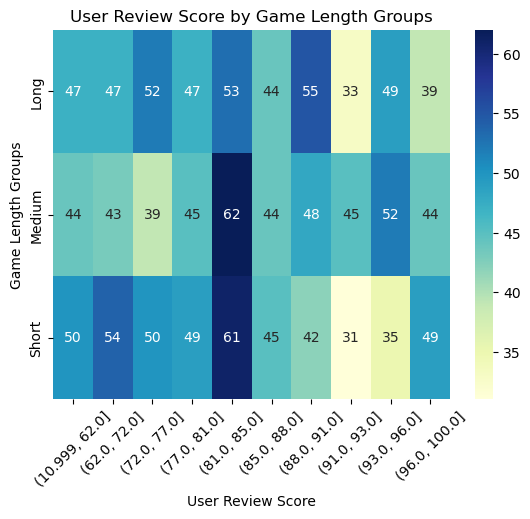

In [ ]:
# Bin the play user review scores
df_playtimeLength['binReview'] = pd.qcut(df_playtimeLength['reviewScore'], q=10)
heat_data_length = pd.crosstab(df_playtimeLength['playtimeLength'], df_playtimeLength['binReview'])

# Create the heatmap using seaborn
sns.heatmap(heat_data_length, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("User Review Score by Game Length Groups")
plt.xlabel("User Review Score")
plt.ylabel("Game Length Groups")
plt.xticks(rotation=45)
plt.show()

From our earlier analysis we already determined that score of 80 and above are what we clasify as positive, and by looking at the heatmap we can identify that games with short and medium length tends to recieve positive score. This will be a factor for us to consider making games that have a length of only under 10 hours.

### What is the revenue-per-copy range among top-selling indie games?

To answer this question, we will have to first calculate the revenue-per-copy of the games, because we don't have that metric yet. We can easily do it by making a new dataframe that have a column to calculate the values of revenue divided byb copies sold.

In [ ]:
df_revenue = df[['revenue', 'copiesSold', 'publisherClass']]
df_revenue['revenueCopy'] = df_revenue['revenue'] / df_revenue['copiesSold']
df_revenue.sample(5)

C:\Users\iangr\AppData\Local\Temp\ipykernel_37076\1742613674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['revenueCopy'] = df_revenue['revenue'] / df_revenue['copiesSold']


,revenue,copiesSold,publisherClass,revenueCopy
645,54348.0,8232,Indie,6.602041
1490,9602451.0,174510,AAA,55.025219
1036,23150.0,1976,AA,11.715587
1350,387300.0,51499,Indie,7.520534
882,32198.0,2255,Indie,14.278492


Now that we have this dataframe, we must now once more define what makes a top selling game. For this segment we will use the top 25% copies sold as the metric for top selling games. With this we can query the dataframe to only show top selling Indie games.

In [ ]:
top_selling = df['copiesSold'].quantile(0.75)
top_indie = df_revenue[(df_revenue['publisherClass'] == 'Indie') & (df_revenue['copiesSold'] >= top_selling)]
top_indie.sample(5)

,revenue,copiesSold,publisherClass,revenueCopy
24,4644684.0,285596,Indie,16.263127
6,7534369.0,328945,Indie,22.904647
564,2678385.0,181670,Indie,14.743133
585,2172825.0,102708,Indie,21.155363
1311,478886.0,55920,Indie,8.563770


Now we finally can answer this question by calculating the central tendency of the top indie games. I'll be using the describe() function to help me with this.

In [227]:
top_indie_stats = top_indie['revenueCopy'].describe()
print(top_indie_stats)

top_indie_range = top_indie_stats['max'] - top_indie_stats['min']
print('range    ', top_indie_range)

top_indie_skew = top_indie['revenueCopy'].skew()
print('skew     ', top_indie_skew)

IQR = top_indie_stats['75%'] - top_indie_stats['25%']
print('IQR      ', IQR)

count    262.000000
mean      12.761184
std        8.685439
min        0.010180
25%        6.474793
50%       11.481038
75%       17.106697
max       50.583293
Name: revenueCopy, dtype: float64
range     50.57311328324035
skew      1.324193659046906
IQR       10.631903544434582


We got some interesting data from this. First we can concur that the distribution of the revenue per copy is positively skewed to the right, but this is not a problem because we can still find the ranges of the revenue per copy taht we are aiming for. If we calculate the range by using only the maximum and minimum revenue percopy, we'll get an outstanding 50.58 usd in revenue per copy. This however is not a great way to calculate our revenue per copy because we are only using the outliers here. With a mean of 12 dollars and a standard deviation of 8 dollars from the median, we can see that the min and max values are heavy with outliers.

To circumfent this, it is better to use interquartile range (IQR) instead. By calculating using the first quartile and third quartile we get the IQR of 10.63 dollars of revenue per copy, which is the more reasonable value that we sould aim for. The IQR is a far better metric to use for calculating range on a skewed distribution because we're not using the outliers that ere pulling the numbers away from the median. Below is the visualization of our measurements by histogram chart.

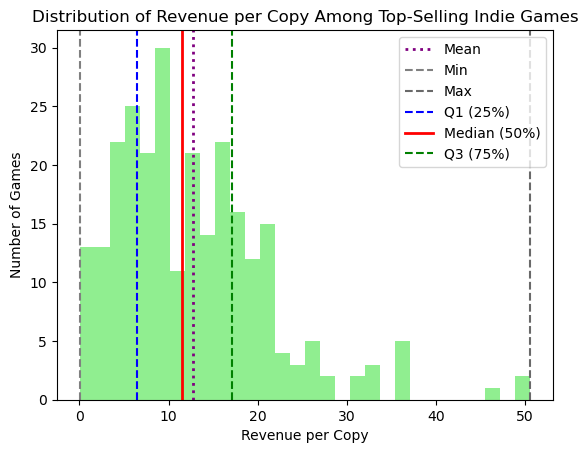

In [296]:
plt.hist(top_indie['revenueCopy'], bins=30, color='lightgreen')
plt.title('Distribution of Revenue per Copy Among Top-Selling Indie Games')
plt.xlabel('Revenue per Copy')
plt.ylabel('Number of Games')

plt.axvline(top_indie_stats['mean'], color='purple', linestyle=':', linewidth=2, label='Mean')
plt.axvline(top_indie_stats['min'], color='grey', linestyle='--', label='Min')
plt.axvline(top_indie_stats['max'], color='dimgrey', linestyle='--', label='Max')
plt.axvline(top_indie_stats['25%'], color='blue', linestyle='--', label='Q1 (25%)')
plt.axvline(top_indie_stats['50%'], color='red', linestyle='-', linewidth=2, label='Median (50%)')
plt.axvline(top_indie_stats['75%'], color='green', linestyle='--', label='Q3 (75%)')

plt.legend()
plt.show()

And because in the end we are focusing on using IQR for calculating our range, I'm also including the best chart type for this exact purpose, the box and whisker chart.

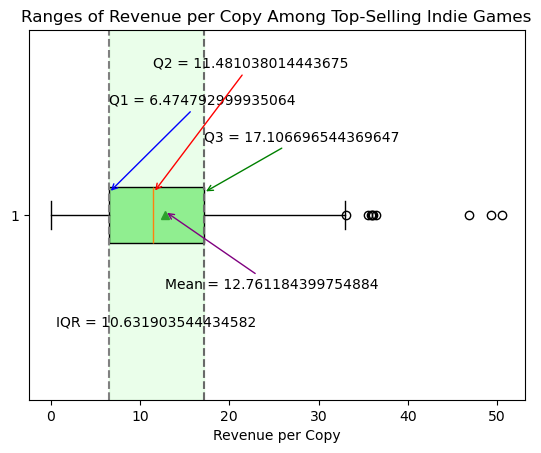

In [298]:
plt.boxplot(top_indie['revenueCopy'], vert=False, patch_artist=True, showmeans=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Ranges of Revenue per Copy Among Top-Selling Indie Games")
plt.xlabel("Revenue per Copy")

plt.annotate(f'Q1 = {top_indie_stats['25%']}', xy=(top_indie_stats['25%'], 1.06), xytext=(top_indie_stats['25%'], 1.3), arrowprops=dict(color='blue', arrowstyle='->'))
plt.annotate(f'Q2 = {top_indie_stats['50%']}', xy=(top_indie_stats['50%'], 1.06), xytext=(top_indie_stats['50%'], 1.4), arrowprops=dict(color='red', arrowstyle='->'))
plt.annotate(f'Q3 = {top_indie_stats['75%']}', xy=(top_indie_stats['75%'], 1.06), xytext=(top_indie_stats['75%'], 1.2), arrowprops=dict(color='green', arrowstyle='->'))
plt.annotate(f'Mean = {top_indie_stats['mean']}', xy=(top_indie_stats['mean'], 1.01), xytext=(top_indie_stats['mean'], 0.8), arrowprops=dict(color='purple', arrowstyle='->'))
plt.annotate(f'IQR = {top_indie_stats['75%'] - top_indie_stats['25%']}', xy=((top_indie_stats['25%'] + top_indie_stats['75%'])/2, 0.7), ha='center')

plt.axvline(top_indie_stats['25%'], linestyle='--', color='gray', label='Q1')
plt.axvline(top_indie_stats['75%'], linestyle='--', color='dimgray', label='Q3')
plt.axvspan(top_indie_stats['25%'], top_indie_stats['75%'], alpha=0.2, color='palegreen', label='IQR')

plt.show()

As we can see above, the box and whisker chart has an amazing readibility on a skewed distribution. We can easily see our interquartile range, the actual revenue per copy range that we are aiming for, highlighted by the light green color. We can also see that the data does indeed have a good sum of positive outliers, pulling out mean to the right side of its median, resulting in bad reading of range if we're not using IQR.

### When are the best months to release a new game, based on the sales trends?

To answer this question, we must first extract the months from our release date column. This is the exact reason we did data type cleaning earlier, because it would not be possible if it's still on the object data type. Again to preserve our original dataframe, I'm gonna create a new dataframe for this visualization.

In [375]:
df_release = df[['releaseDate', 'copiesSold']]
df_release['releaseMonth'] = df_release['releaseDate'].dt.month
df_release.head(5)

C:\Users\iangr\AppData\Local\Temp\ipykernel_37076\2388565731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release['releaseMonth'] = df_release['releaseDate'].dt.month


,releaseDate,copiesSold,releaseMonth
0,2024-03-07,165301,3
1,2024-07-25,159806,7
2,2024-08-15,214192,8
3,2024-06-14,440998,6
4,2024-06-13,141306,6


Now that we have a new dataframe that only consists of copies sold column along with release date and its extracted month, we have to aggregate and query our dataframe to give us the sums of all copies sold grouped by month. We can do this using the code below, giving us another new dataframe.

In [382]:
monthly_sold = df_release[['releaseMonth', 'copiesSold']].groupby(['releaseMonth']).sum()
monthly_sold

,copiesSold
releaseMonth,
1,25722203
2,36841476
3,9132669
4,49414808
5,9896845
6,18203910
7,20680119
8,23957943
9,1708216


Now we have the perfect dataframe for our analysis, an index of release date months and values of the sums of copies sold. Now all we have to do is make the visualization using line chart, because of course it is one of the best chart for a timely growth of one category.

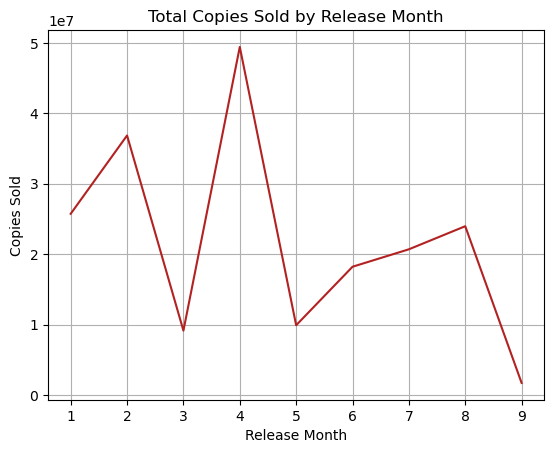

In [514]:
sns.lineplot(monthly_sold, x=monthly_sold.index, y=monthly_sold['copiesSold'], color= 'firebrick')
plt.title('Total Copies Sold by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Copies Sold')
plt.grid(True)

plt.show()

See, because we use line chart, we can imediately see the spike of copies sold of games release on the month of April. We can't tell for sure what is happening in april for making this huge spike of sales because we don't have the data to back up any claim about sales and stuff, but we can at least use this data as a base for our launching strategy, because whatever happened in april, it works.

### How strongly is average playtime correlated with user review score?

To answer this question, we will now use inferential statistics by testing two hypotheses, which are one null hypothesis and one alternative hypothesis below.

##### Defining the Hypotheses

`H0 (null Hypothesis): There is no correlation between average playtime and user review score (rho = 0)`

`H1 (alternative Hypothesis): There is a correlation (rho != 0)`

Now in order to be able to answer these hypotheses without bias and not subjective, we can use a method called spearman's correlation analysis. Why we are using spearman's method and not the other two is because our data is extremely skewed to the right as we've analyzed previously. Using this calculation, we will get our rho correlation value and P-value as shown below.

In [393]:
corr_rho, pval_s = stats.spearmanr(df['avgPlaytime'], df['reviewScore'])
print(f"Spearman's rho: {corr_rho:.2f}, P-Value: {pval_s:.4f}")

Spearman's rho: 0.01, P-Value: 0.5923


With these values we can draw a conclusion regarding our hypotheses. First off because or rho value is just barely greater than 0, we can drop the null hypothesis and concur that there is infact a correlation between average playtime and review score, but because the rho value is so close to zero the correlation is really weak. We can back it up with the p-value, because we actually got a p-value greather than the alpha of 0.05, we can say that the correlation between average playtime and review score exists purely by chance. The correlation is weak and by chance, therefore we can ignore it in our pre-launch strategy.

To visualize the correlation even better, we can use a scatter plot chart with a correlation line below.

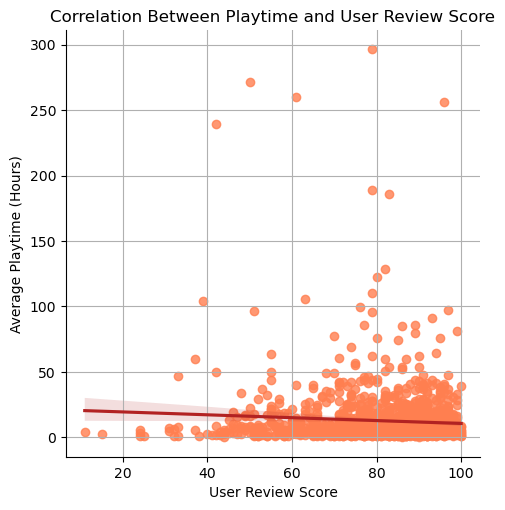

In [ ]:
sns.lmplot(df, x='reviewScore', y='avgPlaytime', scatter_kws={'color': 'coral'}, line_kws={'color': 'firebrick'})
plt.title("Correlation Between Playtime and User Review Score")
plt.xlabel("User Review Score")
plt.ylabel("Average Playtime (Hours)")
plt.grid(True)

plt.show()

And as we can see here, there is infact a correlation based on the correlation line, but it is really weak. We can also tell by the angle of the line that the correlation is a negative correlation.

### How can we scope our first game to match top 25% performers in this dataset?

Finally, to answer this question, we can filter query our whole dataframe using the top selling metric that we have established on the previous analysis. As ususal i'll query it into a new dataframe.

In [480]:
top_games = df[df['copiesSold'] >= top_selling]
top_games.sample(5)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
49,Rotwood,2024-04-24,412521,10.99,3180800.0,8.798470,73,AA,Klei Entertainment,Klei Entertainment,2015270
1482,NBA 2K25,2024-09-03,171817,69.99,10822924.0,9.623976,47,AAA,2K,Visual Concepts,2878980
1103,Living With Sister: Monochrome Fantasy,2024-03-22,230496,12.99,1838206.0,10.709267,97,Indie,Kagura Games,Inusuku,2429860
39,F1® Manager 2024,2024-07-23,111464,34.99,3428483.0,22.803547,66,AA,Frontier Developments,Frontier Developments,2591280
1125,Avatar: Frontiers of Pandora™,2024-06-17,39220,69.99,1554033.0,20.076900,64,AAA,Ubisoft,Massive Entertainment – A Ubisoft Studio,2840770


Now to be able to scope how to match the top 25% best selling games, we need to compare the factors between the top performers and the whole data. To do this I'll be using stacked charts, all combined into one subplot below.

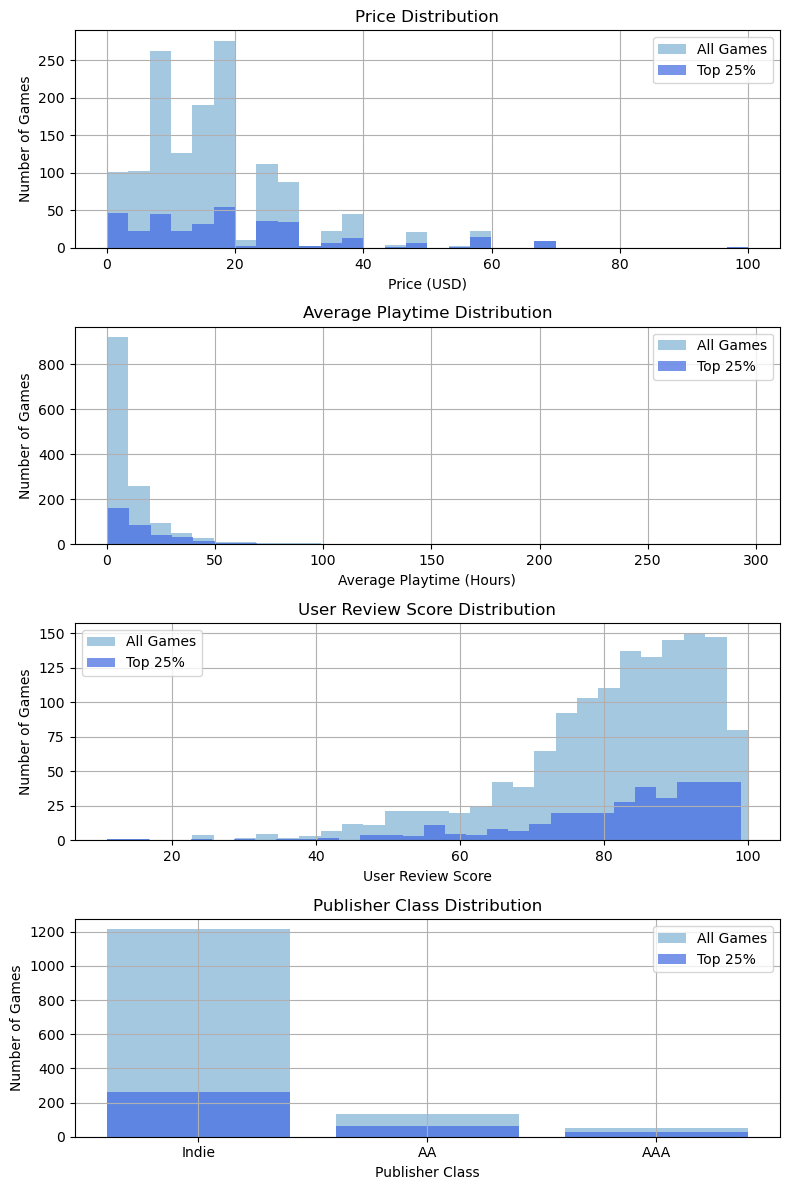

In [515]:
# Setup figure layout
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Plot 1: Histogram of Price
axs[0].hist(df['price'], bins=30, alpha=0.4, label='All Games')
axs[0].hist(top_games['price'], bins=30, alpha=0.7, label='Top 25%', color='royalblue')
axs[0].set_title('Price Distribution')
axs[0].set_xlabel('Price (USD)')
axs[0].set_ylabel('Number of Games')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Histogram of Average Playtime
axs[1].hist(df['avgPlaytime'], bins=30, alpha=0.4, label='All Games')
axs[1].hist(top_games['avgPlaytime'], bins=30, alpha=0.7, label='Top 25%', color='royalblue')
axs[1].set_title('Average Playtime Distribution')
axs[1].set_xlabel('Average Playtime (Hours)')
axs[1].set_ylabel('Number of Games')
axs[1].legend()
axs[1].grid(True)

# Plot 3: Histogram of Review Scores
axs[2].hist(df['reviewScore'], bins=30, alpha=0.4, label='All Games')
axs[2].hist(top_games['reviewScore'], bins=30, alpha=0.7, label='Top 25%', color='royalblue')
axs[2].set_title('User Review Score Distribution')
axs[2].set_xlabel('User Review Score')
axs[2].set_ylabel('Number of Games')
axs[2].legend()
axs[2].grid(True)

# Plot 4: Publisher Class Distribution
top_publishers = top_games['publisherClass'].value_counts()
all_publishers = df['publisherClass'].value_counts()
x = top_publishers.index
axs[3].bar(x, all_publishers[x], label='All Games', alpha=0.4)
axs[3].bar(x, top_publishers[x], label='Top 25%', alpha=0.7, color='royalblue')
axs[3].set_title('Publisher Class Distribution')
axs[3].set_xlabel('Publisher Class')
axs[3].set_ylabel('Number of Games')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

We got some interesting data to analyze here. Looking at the price distribution metric, average playtime distribution metric, and user review score distribution metric between all games vs only the top performers, we can see that data from the whole game have way higher peaks than data only from the top performers. We can conclude from this that the ones who actually pulling the data up are the non top performers. This means we can achieve an easier goal if we only look at the top performers.

And finally if we look it from the publisher class distribution metric, we can see that even in the top performer's bracket, indie games still reign supreme by a sizable margin. This is a really good news once more for all indie game companies including us, because we can not only beat the top dogs of the gaming industry, we're actually dominating them.

# 6. Conclusion

In conclusion from all of our analysis, we have a couple of points to consider:
- We confidently have a potential revenue per copies sold of 10.63 dollars
- There are no significant correlation between user review and playtime.
- Price, playtime, and release date month are factors to really consider for launching our game.

Reccommended pre-launch strategy to achieve within the first quarter:
- Launch our game at the month of february
- Target a low to medium lenght
- Target a lower pricing